In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1 = pd.read_csv('weatherHistory.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted_Date              96453 non-null object
Summary                     96453 non-null object
Precip_Type                 95936 non-null object
Temperature_(C)             96453 non-null float64
Apparent_Temperature_(C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind_Speed_(km/h)           96453 non-null float64
Wind_Bearing_(degrees)      96453 non-null float64
Visibility_(km)             96453 non-null float64
Loud_Cover                  96453 non-null float64
Pressure_(millibars)        96453 non-null float64
Daily_Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
data1.head()

Formatted_Date        Summary Precip_Type  Temperature_(C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent_Temperature_(C)  Humidity  Wind_Speed_(km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind_Bearing_(degrees)  Visibility_(km)  Loud_Cover  Pressure_(millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily_Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [4]:
data1.hist(bins=50, figsize=(8,6))
plt.tight_layout()
plt.show()

In [5]:
data1.describe()

Temperature_(C)  Apparent_Temperature_(C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind_Speed_(km/h)  Wind_Bearing_(degrees)  Visibility_(km)  Loud_Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean          543.016924              187.509232       237.194132         0.0   
std          2764.988124              107.383428      1445.114340         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             6.053600              116.000000         9.708300         0.0   
50%            10.481100              180.000000        10.255700         0.0   
75%            15.021300              290.000000        14.956900         0.0   
max         46207.000000              359.000000     15456.000000         0.0   

       Pressure_(millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(data1, test_size=0.2, random_state=35)

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(data1),len(train_set),len(test_set)))

data has 96453 instances
 77162 train instances
 19291 test intances


In [8]:
train = train_set.copy()

In [9]:
corr_matrix = train.corr()
corr_matrix["Temperature_(C)"].\
  sort_values(ascending=False)

Temperature_(C)             1.000000
Apparent_Temperature_(C)    0.992612
Wind_Bearing_(degrees)      0.028813
Wind_Speed_(km/h)           0.000806
Pressure_(millibars)       -0.004093
Visibility_(km)            -0.094965
Humidity                   -0.632908
Loud_Cover                       NaN
Name: Temperature_(C), dtype: float64

In [10]:
corr_matrix = train.corr()
corr_matrix["Apparent_Temperature_(C)"].\
  sort_values(ascending=False)

Apparent_Temperature_(C)    1.000000
Temperature_(C)             0.992612
Wind_Bearing_(degrees)      0.027890
Pressure_(millibars)        0.001826
Wind_Speed_(km/h)          -0.005913
Visibility_(km)            -0.094660
Humidity                   -0.603114
Loud_Cover                       NaN
Name: Apparent_Temperature_(C), dtype: float64

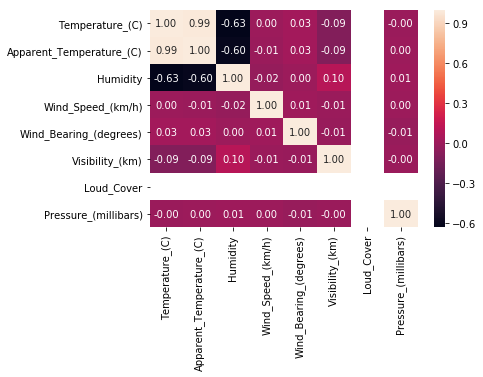

In [11]:
import seaborn as sns
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")

In [24]:
train_X = train_set.drop(["Temperature_(C)", "Formatted_Date", "Summary", "Precip_Type", "Daily_Summary"], axis=1)

train_y = train_set["Temperature_(C)"].copy()

In [25]:
train_X.isnull().sum()

Apparent_Temperature_(C)    0
Humidity                    0
Wind_Speed_(km/h)           0
Wind_Bearing_(degrees)      0
Visibility_(km)             0
Loud_Cover                  0
Pressure_(millibars)        0
dtype: int64

In [26]:
print(train_set["Temperature_(C)"].mean(), train_set["Apparent_Temperature_(C)"].mean(), train_set["Humidity"].mean()) 

11.955920300435796 10.883576832580346 0.7346461989061491


In [27]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print("Predictions:", lin_reg.predict(train_X)) 

Predictions: [ 6.53005448  1.32839514  7.77077171 ... 29.74572441  7.37793661
 21.84734682]


In [32]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train_X)
lin_mse = mean_squared_error(train_y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.0818084732385855